동전의 앞면과 뒷면이 나올 확률은 각각 0.5이다.

이 동전을 1000 번 던져서, 앞면이 나올 확률을 선 그래프로 완성하시오.

선 그래프는 x 축은 0부터 1000까지, y축은 0부터 1까지로 나타나야 합니다.

y가 0.5인 x축에 평행한 선을 빨간색으로 함께 나타내야 합니다.



In [98]:
import platform
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# OS 판별
system_name = platform.system()

# 한글 폰트 설정
if system_name == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif system_name == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    # Linux 등 기타 OS는 여기서 지정
    plt.rcParams['font.family'] = 'NanumGothic'  # 설치되어 있어야 함

# 음수 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [100]:
n = 1000

result = np.random.choice(["H","T"], size=n, replace=True, p=[0.5,0.5]) # 동전던지기 1000번 시행 결과 리스트 
result[:50] # 50번째까지만 출력 

array(['T', 'H', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'T', 'H', 'T',
       'T', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'T', 'H', 'H', 'T',
       'H', 'H', 'H', 'H', 'T', 'H', 'H', 'T', 'H', 'H', 'T', 'T', 'T',
       'T', 'H', 'H', 'H', 'H', 'T', 'H', 'T', 'T', 'T', 'H'], dtype='<U1')

In [102]:
heads = (result == "H").astype(int) # 이산형 데이터니까 앞면 : 1 뒷면 : 0으로 매핑 

In [104]:
cumul_heads = np.cumsum(heads) # 앞면의 누적 개수 
cumul_heads[950:999] 

array([483, 484, 484, 484, 484, 485, 486, 487, 487, 488, 489, 489, 490,
       491, 491, 491, 492, 492, 492, 493, 493, 494, 494, 495, 495, 496,
       497, 498, 499, 500, 501, 502, 502, 503, 504, 504, 504, 504, 504,
       505, 505, 506, 506, 506, 506, 506, 506, 507, 507])

In [106]:
trial_num = np.arange(1, n + 1) # 시행횟수 
prob = cumul_heads / trial_num # 지금까지 앞면이 나올 확률 = 사건 / 표본공간 
prob[950:999] # 시행히 많아질수록 0.5로 근사 

array([0.50788644, 0.50840336, 0.50786988, 0.50733753, 0.50680628,
       0.50732218, 0.50783699, 0.50835073, 0.50782065, 0.50833333,
       0.50884495, 0.50831601, 0.50882658, 0.5093361 , 0.50880829,
       0.50828157, 0.50879007, 0.50826446, 0.50773994, 0.50824742,
       0.507724  , 0.50823045, 0.50770812, 0.50821355, 0.50769231,
       0.50819672, 0.5087001 , 0.50920245, 0.50970378, 0.51020408,
       0.51070336, 0.51120163, 0.51068159, 0.51117886, 0.51167513,
       0.51115619, 0.5106383 , 0.51012146, 0.50960566, 0.51010101,
       0.50958628, 0.51008065, 0.50956697, 0.50905433, 0.50854271,
       0.50803213, 0.50752257, 0.50801603, 0.50750751])

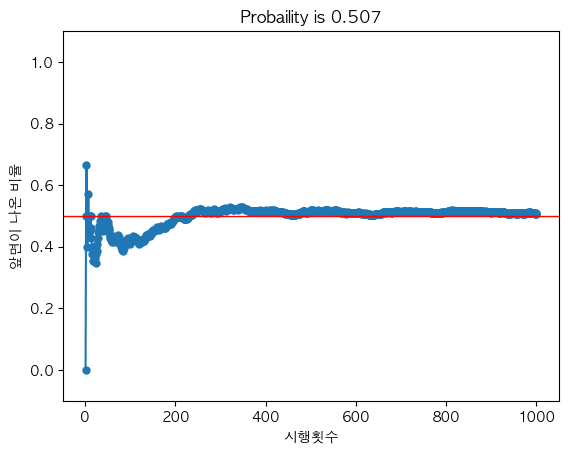

In [117]:
plt.plot(trial_num, prob, marker="o", linestyle = '-', markersize=5)
plt.ylim(-0.1,1.1)
plt.xlabel('시행횟수')
plt.ylabel('앞면이 나온 비율')
plt.title(f'Probaility is {prob[999]}')
plt.axhline(y=0.5, color='red', linewidth=1)
plt.show()